In [ ]:
import os
from google.colab import drive
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm


In [ ]:
drive.mount('/content/gdriv')

Drive already mounted at /content/gdriv; to attempt to forcibly remount, call drive.mount("/content/gdriv", force_remount=True).


In [ ]:
data_path = "/content/gdriv/My Drive/데이터마이닝" 
print(data_path)
os.listdir(data_path)

/content/gdriv/My Drive/데이터마이닝


['소스코드.ipynb',
 'bus.csv',
 '격자데이터.csv',
 'night_bus_station.csv',
 'term_project.csv',
 'shop.csv',
 'bus.ipynb']

In [ ]:
"""bus = pd.read_csv('bus.csv',encoding='cp949')
bus
night_bus = bus[bus['노선번호'].str.contains('N')]
night_bus['사용년월'].value_counts()
night_bus"""


"bus = pd.read_csv('bus.csv',encoding='cp949')\nbus\nnight_bus = bus[bus['노선번호'].str.contains('N')]\nnight_bus['사용년월'].value_counts()\nnight_bus"

In [ ]:
#night_bus['총승차승객수'] = night_bus['00시승차총승객수'] + night_bus['1시승차총승객수'] + night_bus['2시승차총승객수'] + night_bus['3시승차총승객수']+night_bus['4시승차총승객수'] + night_bus['5시승차총승객수']
#night_bus['총하차승객수'] = night_bus['00시하차총승객수'] + night_bus['1시하차총승객수'] + night_bus['2시하차총승객수'] + night_bus['3시하차총승객수']+night_bus['4시하차총승객수'] + night_bus['5시하차총승객수']

In [ ]:
#night_bus = night_bus[['사용년월','노선번호','역명','총승차승객수','총하차승객수']]
#night_bus_station = night_bus.groupby(night_bus['역명'], as_index=False).mean()
#night_bus_station

#night_bus_station['수요'] = night_bus_station['총승차승객수'] + night_bus_station['총하차승객수']




In [ ]:
#night_bus_station = night_bus_station[['역명','수요']]

In [ ]:
#night_bus_station.to_csv(path_or_buf= data_path + '/night_bus_station.csv',encoding='utf-8-sig')

In [ ]:
night_bus_station = pd.read_csv(data_path+ '/night_bus_station.csv')
night_bus_station = night_bus_station.loc[1:,:]
night_bus_station = night_bus_station.reset_index()
night_bus_station = night_bus_station[['역명','경도','위도','수요']]
night_bus_station

,역명,경도,위도,수요
0,BC카드.남부터미널,127.014242,37.484657,389.125000
1,KBS스포츠월드,126.850502,37.556671,237.416667
2,KT&G관악지점,126.937254,37.484394,197.739583
3,KT강서지사,126.847840,37.529938,521.208333
4,KT관악지점,126.947106,37.481920,276.125000
...,...,...,...,...
729,회기동현대아파트,127.054441,37.588991,170.416667
730,회기시장,127.056658,37.591000,391.458333
731,훼미리근린공원,127.114839,37.491326,199.625000
732,휘경동입구,127.055221,37.587708,383.125000


In [ ]:
grid = pd.read_csv(data_path+'/격자데이터.csv')
grid
coord_1m = 0.00000906
grid['수요'] = 0

for i in range(len(night_bus_station)):
    location = grid[(grid['lon_max']<=night_bus_station.loc[i,'경도']+coord_1m*500)&(grid['lat_max']<=night_bus_station.loc[i,'위도']+coord_1m*500)&(grid['lon_min']>=night_bus_station.loc[i,'경도']-coord_1m*500)&(grid['lat_min']>=night_bus_station.loc[i,'위도']-coord_1m*500)].index
    grid.loc[location, '수요'] += night_bus_station.loc[i,'수요']

In [ ]:
grid['수요'].value_counts()

0.000000       44853
666.333333        63
300.958333        63
933.375000        61
52.812500         60
               ...  
1732.833333        1
1461.895833        1
607.687500         1
1909.362944        1
3543.234849        1
Name: 수요, Length: 2147, dtype: int64

In [ ]:
shop = pd.read_csv(data_path + '/shop.csv', encoding='cp949')
shop
shop.rename(columns = {"엑스좌표_값": "경도", "와이좌표_값": "위도"}, inplace=True)
shop


,상권_코드,면적(㎡),경도,위도,생활인구_수,집객시설_수,극장_수,숙박_시설_수,지하철역_수,버스_정거장_수,총_상주인구_수,총_가구_수,매출건수,점포_수,총세대_수,반경
0,1000001,125351,126.986403,37.582043,430483,73,16,38,0,10,1800,797,"120,236",4.52,364.0,199.168366
1,1000002,31696,127.022595,37.573212,478625,8,1,3,0,1,1214,793,"206,983",3.44,380.0,100.151783
2,1000003,113806,126.988419,37.575664,190685,41,1,8,0,4,1442,832,"256,113",5.32,92.0,189.775017
3,1000004,44023,126.994996,37.588720,1288180,12,0,1,0,5,1671,844,"304,904",3.63,505.0,118.031051
4,1000005,367064,126.967762,37.597113,295991,8,1,1,0,3,650,637,"51,891",2.42,486.0,340.821792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,1001492,928278,126.981856,37.564149,2250850,593,51,25,2,50,1104,500,"5,028,505",NaN,NaN,541.995259
1492,1001493,610708,127.011025,37.567312,5148590,165,14,16,4,21,2427,1233,"6,565,495",222.50,569.0,439.615770
1493,1001494,635586,126.997374,37.569998,4142705,327,14,49,5,39,1924,1501,"3,796,521",87.38,623.0,448.480557
1494,1001495,2334402,127.115275,37.516476,3925020,242,23,22,3,31,8221,4178,"5,645,175",35.26,2973.0,859.496835


In [ ]:
shop['반경'].mean()

146.06008459477974

In [ ]:
grid['점포'] = 0
grid['생활인구'] = 0
grid['집객시설'] = 0
grid['극장'] = 0
grid['숙박시설'] = 0
grid['지하철역'] = 0
grid['버스정거장'] = 0
grid['상주인구'] = 0
grid['가구'] = 0
grid['매출건수'] = 0
grid['세대수'] = 0

for i in range(len(shop)):
    location = grid[(grid['lon_max']<=shop.loc[i,'경도']+coord_1m*500)&(grid['lat_max']<=shop.loc[i,'위도']+coord_1m*500)&(grid['lon_min']>=shop.loc[i,'경도']-coord_1m*500)&(grid['lat_min']>=shop.loc[i,'위도']-coord_1m*500)].index
    grid.loc[location, '점포'] += shop.loc[i,'점포_수']
    grid.loc[location, '생활인구'] += shop.loc[i,'생활인구_수']
    grid.loc[location, '극장'] += shop.loc[i,'극장_수']
    grid.loc[location, '숙박시설'] += shop.loc[i,'숙박_시설_수']
    grid.loc[location, '지하철역'] += shop.loc[i,'지하철역_수']
    grid.loc[location, '버스정거장'] += shop.loc[i,'버스_정거장_수']
    grid.loc[location, '상주인구'] += shop.loc[i,'총_상주인구_수']
    grid.loc[location, '가구'] += shop.loc[i,'총_가구_수']
    grid.loc[location, '세대수'] += shop.loc[i,'총세대_수']


    


In [ ]:
shop['매출건수'].unique()

array(['120,236', '206,983', '256,113', ..., '6,565,495', '3,796,521',
       '5,645,175'], dtype=object)

In [ ]:
shop = shop.fillna(0)

In [ ]:
shop['매출건수'] = shop['매출건수'].str.replace(',','').astype('float64')
shop['집객시설_수'] = shop['집객시설_수'].str.replace(',','').astype('object')
shop['집객시설_수'] = shop.fillna(0)
shop['집객시설_수'] = pd.to_numeric(shop['집객시설_수'])

In [ ]:
for i in range(len(shop)):
    location = grid[(grid['lon_max']<=shop.loc[i,'경도']+coord_1m*shop.loc[i,'반경'])&(grid['lat_max']<=shop.loc[i,'위도']+coord_1m*shop.loc[i,'반경'])&(grid['lon_min']>=shop.loc[i,'경도']-coord_1m*shop.loc[i,'반경'])&(grid['lat_min']>=shop.loc[i,'위도']-coord_1m*shop.loc[i,'반경'])].index
    grid.loc[location, '집객시설'] += shop.loc[i,'집객시설_수']
    grid.loc[location, '매출건수'] += shop.loc[i,'매출건수']
    

In [ ]:
grid

,격자ID,lon_min,lon_max,lat_min,lat_max,lon_cent,lat_cent,수요,점포,생활인구,집객시설,극장,숙박시설,지하철역,버스정거장,상주인구,가구,매출건수,세대수
0,73680,127.038386,127.039519,37.600540,37.601440,127.038953,37.600990,0.0,13.51,5035019,0,0,3,1,11,6733,4585,0.0,1996.0
1,73683,127.038385,127.039518,37.597837,37.598737,127.038951,37.598287,0.0,8.77,3734418,0,0,1,1,5,6456,3423,0.0,1618.0
2,73682,127.038385,127.039518,37.598738,37.599638,127.038952,37.599188,0.0,8.77,3734418,0,0,1,1,5,6456,3423,0.0,1618.0
3,73693,127.038380,127.039513,37.588827,37.589727,127.038947,37.589277,0.0,5.82,2101235,0,0,4,0,2,2495,2323,0.0,165.0
4,73692,127.038381,127.039513,37.589728,37.590628,127.038947,37.590178,0.0,5.82,2101235,0,0,4,0,2,2495,2323,0.0,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61709,73685,127.038384,127.039517,37.596035,37.596935,127.038950,37.596485,0.0,5.85,2122041,0,0,0,0,2,4234,2637,0.0,1424.0
61710,73684,127.038384,127.039517,37.596936,37.597836,127.038951,37.597386,0.0,8.77,3734418,0,0,1,1,5,6456,3423,0.0,1618.0
61711,73687,127.038383,127.039516,37.594233,37.595133,127.038949,37.594683,0.0,3.02,1630510,0,0,0,0,2,1890,1576,0.0,496.0
61712,73686,127.038383,127.039516,37.595134,37.596034,127.038950,37.595584,0.0,3.02,1630510,0,0,0,0,2,1890,1576,0.0,496.0


In [ ]:
grid.rename(columns={'수요':1,'점포':2,'생활인구':3,'집객시설':4,'극장':5,'숙박시설':6,'지하철역':7,'버스정거장':8,'상주인구':9,'가구':10,'매출건수':11,'세대수':12},inplace=True)



In [ ]:
grid

,격자ID,lon_min,lon_max,lat_min,lat_max,lon_cent,lat_cent,1,2,3,4,5,6,7,8,9,10,11,12
0,73680,127.038386,127.039519,37.600540,37.601440,127.038953,37.600990,0.0,13.51,5035019,0,0,3,1,11,6733,4585,0.0,1996.0
1,73683,127.038385,127.039518,37.597837,37.598737,127.038951,37.598287,0.0,8.77,3734418,0,0,1,1,5,6456,3423,0.0,1618.0
2,73682,127.038385,127.039518,37.598738,37.599638,127.038952,37.599188,0.0,8.77,3734418,0,0,1,1,5,6456,3423,0.0,1618.0
3,73693,127.038380,127.039513,37.588827,37.589727,127.038947,37.589277,0.0,5.82,2101235,0,0,4,0,2,2495,2323,0.0,165.0
4,73692,127.038381,127.039513,37.589728,37.590628,127.038947,37.590178,0.0,5.82,2101235,0,0,4,0,2,2495,2323,0.0,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61709,73685,127.038384,127.039517,37.596035,37.596935,127.038950,37.596485,0.0,5.85,2122041,0,0,0,0,2,4234,2637,0.0,1424.0
61710,73684,127.038384,127.039517,37.596936,37.597836,127.038951,37.597386,0.0,8.77,3734418,0,0,1,1,5,6456,3423,0.0,1618.0
61711,73687,127.038383,127.039516,37.594233,37.595133,127.038949,37.594683,0.0,3.02,1630510,0,0,0,0,2,1890,1576,0.0,496.0
61712,73686,127.038383,127.039516,37.595134,37.596034,127.038950,37.595584,0.0,3.02,1630510,0,0,0,0,2,1890,1576,0.0,496.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)


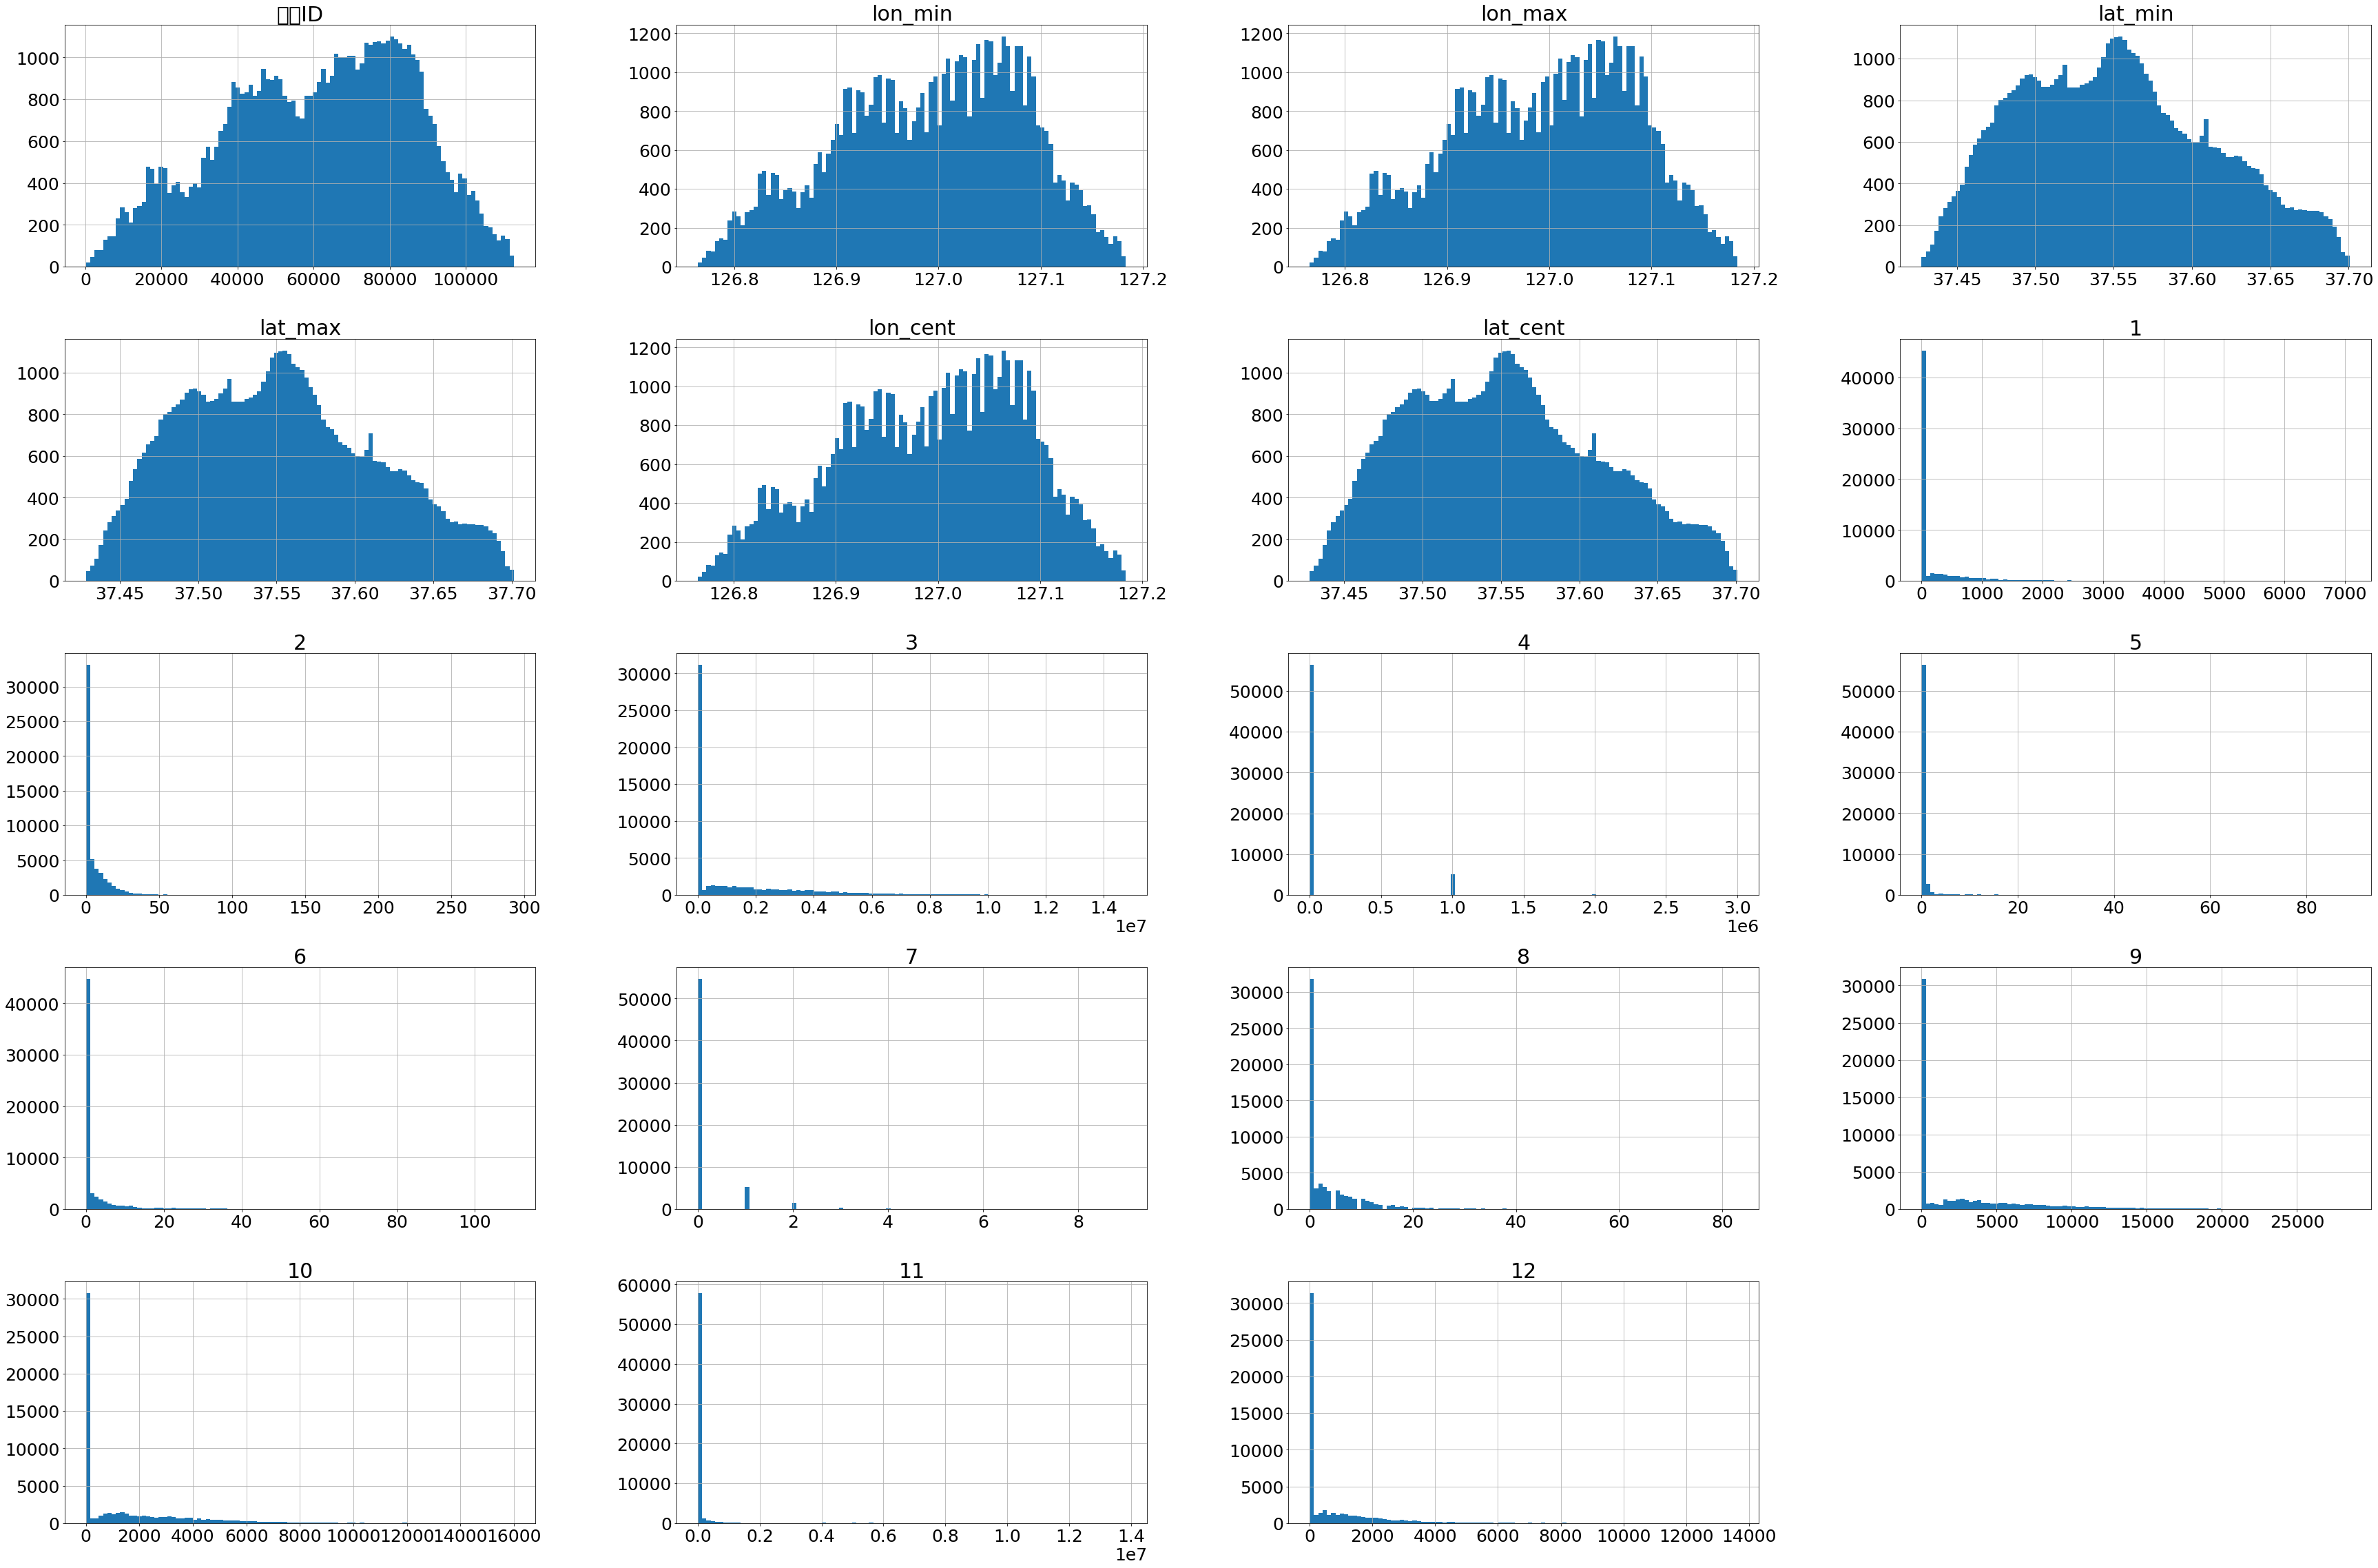

In [ ]:
h = grid.hist(figsize=(60,40),bins=100)
#'수요':1,'점포':2,'생활인구':3,'집객시설':4,'극장':5,'숙박시설':6,'지하철역':7,'버스정거장':8,'상주인구':9,'가구':10,'매출건수':11,'세대수':12

In [ ]:
idx_0 = grid[grid[1]==0].index
grid_not_0 = grid.drop(idx_0)
grid_not_0

,격자ID,lon_min,lon_max,lat_min,lat_max,lon_cent,lat_cent,1,2,3,4,5,6,7,8,9,10,11,12
47,73607,127.038420,127.039554,37.666312,37.667212,127.038987,37.666762,357.708333,27.39,7262522,0,0,1,0,16,16112,8661,0.0,3959.0
59,73613,127.038417,127.039551,37.660906,37.661806,127.038984,37.661356,816.395833,18.58,5590011,0,0,0,0,14,7897,5451,0.0,2765.0
61,73612,127.038418,127.039551,37.661807,37.662707,127.038985,37.662257,816.395833,18.58,5590011,1000361,0,0,0,14,7897,5451,143702.0,2765.0
63,73615,127.038416,127.039550,37.659104,37.660004,127.038983,37.659554,816.395833,9.42,3135294,0,0,0,0,4,7025,3546,0.0,2276.0
65,73614,127.038417,127.039550,37.660005,37.660905,127.038984,37.660455,816.395833,9.39,3177586,0,0,0,0,8,6467,3558,0.0,1933.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61687,73727,127.038364,127.039497,37.558193,37.559094,127.038930,37.558643,636.020833,15.91,4223649,0,0,17,1,6,9200,3955,0.0,1512.0
61688,73726,127.038365,127.039497,37.559094,37.559995,127.038931,37.559544,636.020833,15.91,4223649,0,0,17,1,6,9200,3955,0.0,1512.0
61689,73721,127.038367,127.039500,37.563599,37.564500,127.038933,37.564049,271.645833,6.40,1414582,0,0,6,1,3,6788,2021,0.0,499.0
61691,73723,127.038366,127.039499,37.561797,37.562698,127.038932,37.562247,636.020833,11.89,1850728,0,0,17,1,2,6889,2139,0.0,521.0


In [ ]:
grid_not_0 = grid_not_0.fillna(0)

In [ ]:
grid_not_0.to_csv(path_or_buf= data_path + '/grid_not_0.csv')


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)


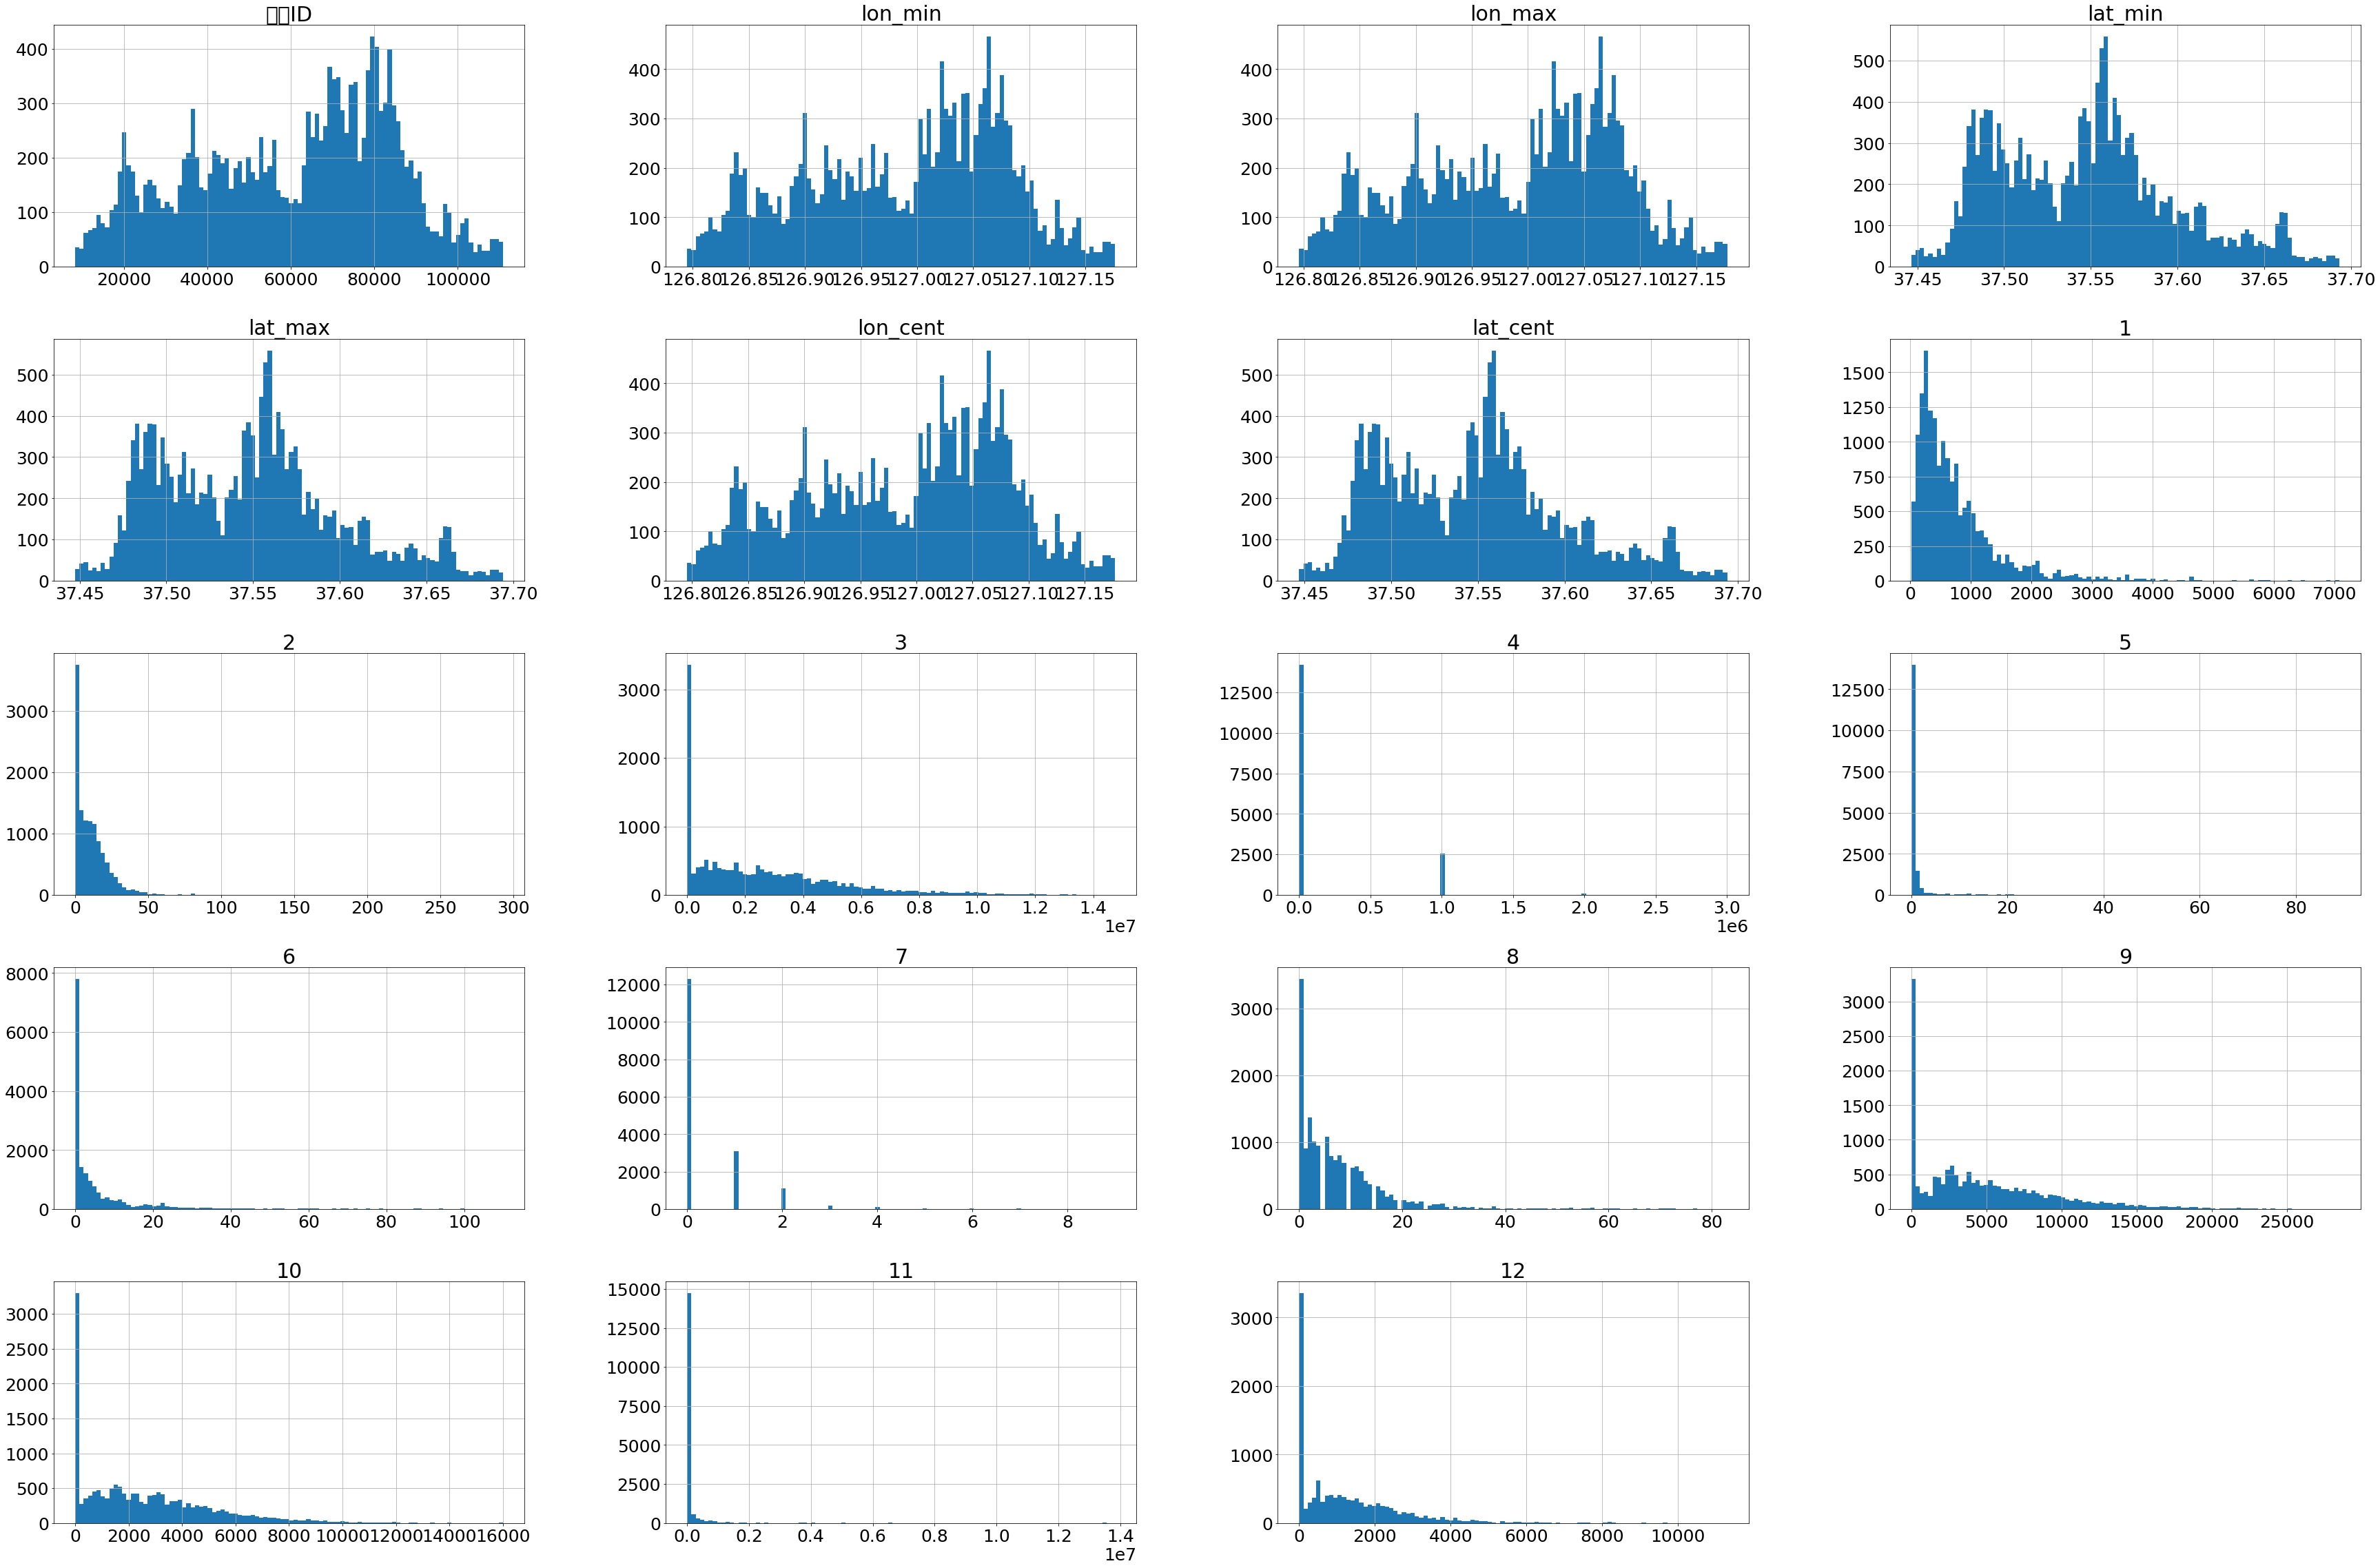

In [ ]:
h1 = grid_not_0.hist(figsize=(60,40),bins=100)

In [ ]:
X = grid_not_0.iloc[:, 8:].values
y = grid_not_0.iloc[:, 7].values


In [ ]:
y = y.reshape(len(y),1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
print(X)

[[ 1.69265394  1.80216873 -0.42451814 ...  2.46724712 -0.19656687
   2.24074563]
 [ 0.9289513   1.1497221  -0.42451814 ...  1.15007028 -0.19656687
   1.35406884]
 [ 0.9289513   1.1497221   2.16484191 ...  1.15007028 -0.03710161
   1.35406884]
 ...
 [-0.12688277 -0.47911295 -0.42451814 ... -0.25738036 -0.19656687
  -0.32868629]
 [ 0.34902274 -0.30897238 -0.42451814 ... -0.20896077 -0.19656687
  -0.31234886]
 [ 0.34902274 -0.30897238 -0.42451814 ... -0.20896077 -0.19656687
  -0.31234886]]


In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_predict = regressor.predict(X)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_predict, y)

0.53851264062875

In [ ]:
# Data
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
grid_heat = grid_not_0.iloc[:,7:]
grid_heat

,1,2,3,4,5,6,7,8,9,10,11,12
47,357.708333,27.39,7262522,0,0,1,0,16,16112,8661,0.0,3959.0
59,816.395833,18.58,5590011,0,0,0,0,14,7897,5451,0.0,2765.0
61,816.395833,18.58,5590011,1000361,0,0,0,14,7897,5451,143702.0,2765.0
63,816.395833,9.42,3135294,0,0,0,0,4,7025,3546,0.0,2276.0
65,816.395833,9.39,3177586,0,0,0,0,8,6467,3558,0.0,1933.0
...,...,...,...,...,...,...,...,...,...,...,...,...
61687,636.020833,15.91,4223649,0,0,17,1,6,9200,3955,0.0,1512.0
61688,636.020833,15.91,4223649,0,0,17,1,6,9200,3955,0.0,1512.0
61689,271.645833,6.40,1414582,0,0,6,1,3,6788,2021,0.0,499.0
61691,636.020833,11.89,1850728,0,0,17,1,2,6889,2139,0.0,521.0


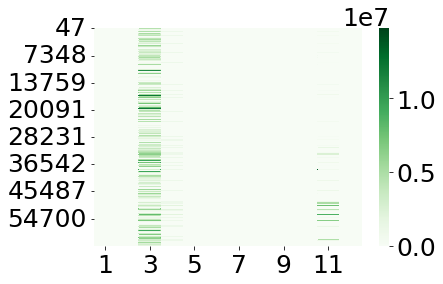

In [ ]:
ax = sns.heatmap(grid_heat, annot=False, annot_kws=dict(color='Greens'), cmap='Greens')
plt.show()